In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(32)

num_samples = 200

delta_13C = np.random.uniform(-20, -17.5, num_samples)
delta_15N = np.random.uniform(8.5, 11, num_samples)

# Create a DataFrame
isotopes = pd.DataFrame({
    'δ13C [‰]': delta_13C,
    'δ15N [‰]': delta_15N
})


In [3]:
X = isotopes["δ13C [‰]"]
y = isotopes["δ15N [‰]"]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=2529)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((140,), (60,), (140,), (60,))

In [6]:
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [8]:
model.fit(X_train,y_train)

LinearRegression()

In [9]:
print(model.intercept_, model.coef_)

7.316153242669476 [-0.13646198]


In [10]:
y_pred = model.predict(X_test)

In [11]:
y_pred

array([ 9.96941108,  9.77614285, 10.01408406,  9.92523966,  9.94122468,
        9.97511985,  9.98214637,  9.90958852,  9.88194786,  9.85677427,
        9.96165158,  9.84029206,  9.75287651,  9.79451249,  9.96400148,
        9.80076281,  9.85725012, 10.04027559,  9.84790831,  9.88944427,
        9.72058719, 10.04302923,  9.76107969, 10.01249537,  9.91824065,
        9.90233454,  9.8375923 ,  9.77619804,  9.79407443,  9.75086327,
        9.74704098,  9.97776402, 10.01090673,  9.83247758, 10.04160714,
        9.94719843,  9.97251575,  9.91530761, 10.01369622,  9.89971871,
        9.9346469 ,  9.84187575,  9.75724344,  9.81254958, 10.03001965,
        9.78492923,  9.86765878,  9.99059521, 10.00196201,  9.7970644 ,
        9.94630915,  9.91289952,  9.94571605, 10.0283581 ,  9.99727347,
        9.80531791,  9.98693128,  9.76203678,  9.7406091 ,  9.73246289])

Predictions for custom values: [ 9.80948679 10.08504915  9.78648409  9.81041572  9.70837817  9.66196295
  9.65101643  9.66342438  9.87213612  9.95030293  9.99176579  9.85847472
 10.03214418  9.95250028  9.88379231  9.75560535  9.79959454 10.01891271
  9.90820004  9.6856233 ]


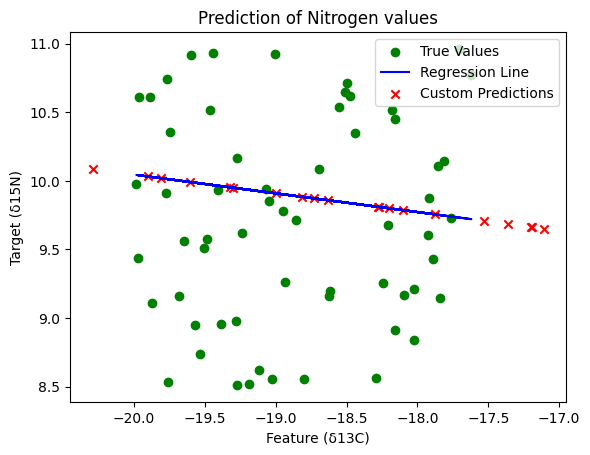

In [12]:
delta_13C_values = np.random.uniform(-20.5, -17, 20)
X_custom = np.array(delta_13C_values).reshape(-1, 1)

y_custom_pred = model.predict(X_custom)

print("Predictions for custom values:", y_custom_pred)

plt.scatter(X_test.flatten(), y_test, color='green', label='True Values')

plt.plot(X_test.flatten(), y_pred, color='blue', label='Regression Line')

plt.scatter(X_custom.flatten(), y_custom_pred, color='red', label='Custom Predictions', marker='x')

plt.xlabel('Feature (δ13C)')
plt.ylabel('Target (δ15N)')
plt.title('Prediction of Nitrogen values')
plt.legend()

plt.show()
